In [1]:
#Import lib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns
import numpy as np
from sklearn import svm
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px
from sklearn.preprocessing import Imputer
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import warnings  
warnings.filterwarnings('ignore')
import os
os.chdir('C:\\Users\\HOME10\\Desktop\\Data mining')
os.getcwd()

'C:\\Users\\HOME10\\Desktop\\Data mining'

In [2]:
df=pd.read_csv("USA_Housing.csv")
df

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386
...,...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\nFPO AE 73316


In [3]:
# DATA EXPLORATION

In [4]:
df.shape

(5000, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
Avg. Area Income                5000 non-null float64
Avg. Area House Age             5000 non-null float64
Avg. Area Number of Rooms       5000 non-null float64
Avg. Area Number of Bedrooms    5000 non-null float64
Area Population                 5000 non-null float64
Price                           5000 non-null float64
Address                         5000 non-null object
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [6]:
df.isna().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

In [7]:
df=df.drop(['Address'], axis=1)

In [8]:
df.rename(columns={'Avg. Area Income': 'Avg_Area_Income','Avg. Area House Age':'Avg_Area_House_Age','Avg. Area Number of Rooms':'Avg_Area_Number_of_Rooms','Avg. Area Number of Bedrooms':'Avg_Area_Number_of_Bedrooms', 'Area Population':'Area_Population'}, index={'ONE': 'one'}, inplace=True)

In [9]:
df.columns

Index(['Avg_Area_Income', 'Avg_Area_House_Age', 'Avg_Area_Number_of_Rooms',
       'Avg_Area_Number_of_Bedrooms', 'Area_Population', 'Price'],
      dtype='object')

In [10]:
df.describe()

,Avg_Area_Income,Avg_Area_House_Age,Avg_Area_Number_of_Rooms,Avg_Area_Number_of_Bedrooms,Area_Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


Boxplot of Price


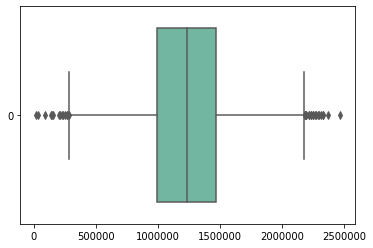

In [11]:
# Box Plot
print('Boxplot of Price')
ax = sns.boxplot(data=df['Price'], orient="h", palette="Set2")

More Boxplot


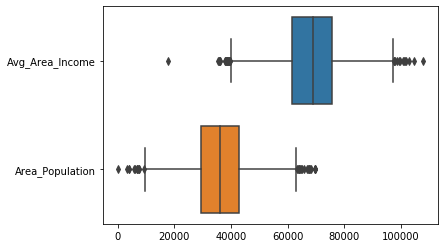

In [12]:
print('More Boxplot')
ax = sns.boxplot(data = df[['Avg_Area_Income','Area_Population']], orient ='h')

[Text(0.5, 0, 'Avg_Area_Income'),
 Text(1.5, 0, 'Avg_Area_House_Age'),
 Text(2.5, 0, 'Avg_Area_Number_of_Rooms'),
 Text(3.5, 0, 'Avg_Area_Number_of_Bedrooms'),
 Text(4.5, 0, 'Area_Population'),
 Text(5.5, 0, 'Price')]

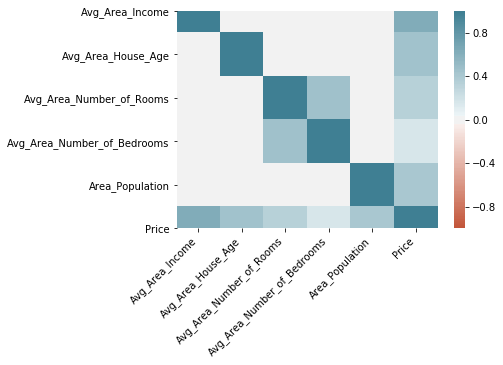

In [13]:
#Correlation heatmap
corr = df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

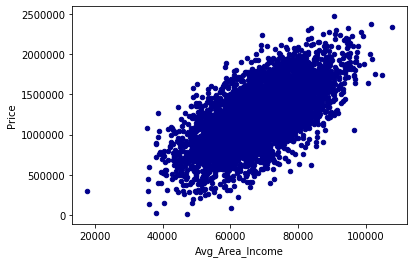

In [14]:
ax1 = df.plot.scatter(x='Avg_Area_Income',
                      y='Price',
                      c='DarkBlue')

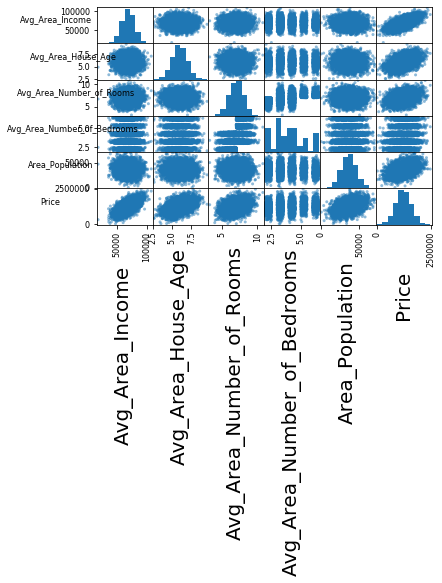

In [15]:
from pandas.plotting import scatter_matrix
for ax in scatter_matrix(df).ravel():
    ax.set_xlabel(ax.get_xlabel(), fontsize = 20, rotation = 90)
    ax.set_ylabel(ax.get_ylabel(), fontsize = 8, rotation = 0)
plt.show()

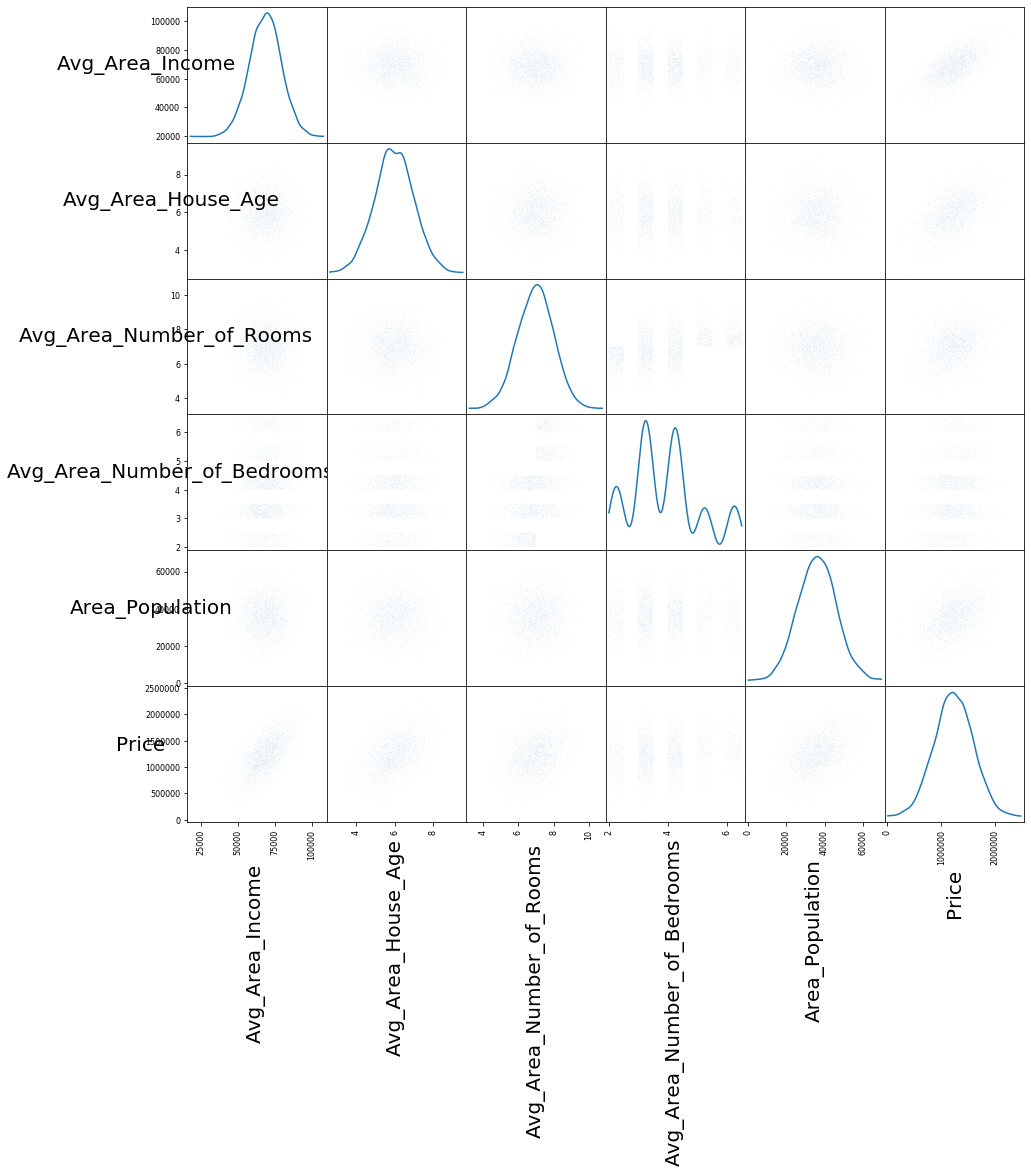

In [16]:
scatter_matrix = scatter_matrix(
    df,
    figsize  = [15, 15],
    marker   = ".",
    s        = 0.2,
    diagonal = "kde"
)

for ax in scatter_matrix.ravel():
    ax.set_xlabel(ax.get_xlabel(), fontsize = 20, rotation = 90)
    ax.set_ylabel(ax.get_ylabel(), fontsize = 20, rotation = 0)

In [17]:
# Corr matrix
corr_matrix = df.corr()
corr_matrix['Price'].sort_values(ascending=False)

Price                          1.000000
Avg_Area_Income                0.639734
Avg_Area_House_Age             0.452543
Area_Population                0.408556
Avg_Area_Number_of_Rooms       0.335664
Avg_Area_Number_of_Bedrooms    0.171071
Name: Price, dtype: float64


# Pairs plot visualization

Text(0.5, 1.03, 'Price  vs. Avg_Area_Income ,Avg_Area_House_Age')

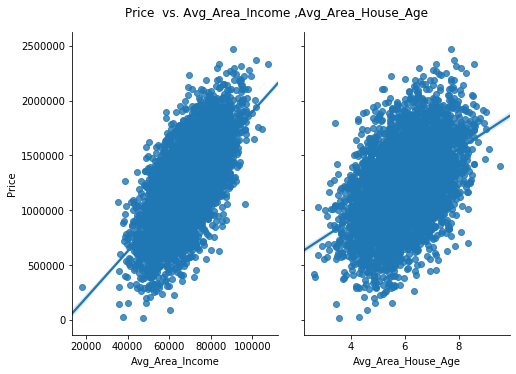

In [18]:


ax_3pairs = sns.pairplot(df, x_vars=['Avg_Area_Income','Avg_Area_House_Age'], 
                         y_vars='Price', height=5, aspect=0.7, kind='reg')

ax_3pairs.fig.suptitle('Price  vs. Avg_Area_Income ,Avg_Area_House_Age', y=1.03)

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
from scipy import stats

Skewness of Price :  -0.0027180649335593944
Kurtosis of price :   -0.05491810893778171


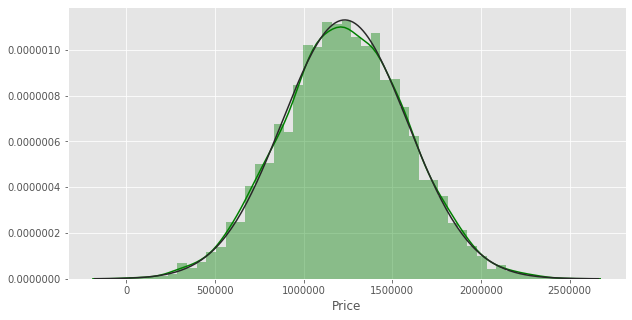

In [20]:
print('Skewness of Price : ',df['Price'].skew())
print("Kurtosis of price :  ",df['Price'].kurt())
plt.figure(figsize = (10,5))
sns.distplot(df['Price'],kde = True,color = 'g',fit = stats.norm)
plt.show()

Skewness of Avg_Area_Number_of_Bedrooms :  0.37624039721554303


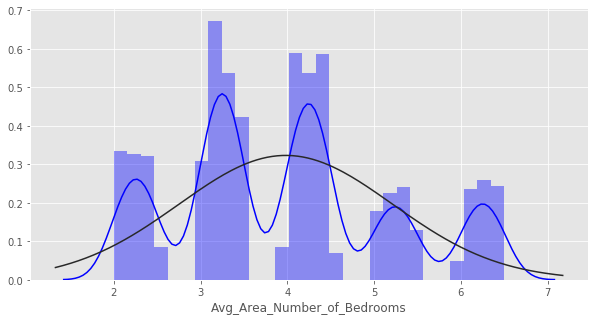

In [21]:
print('Skewness of Avg_Area_Number_of_Bedrooms : ',df['Avg_Area_Number_of_Bedrooms'].skew())
plt.figure(figsize = (10,5))
sns.distplot(df['Avg_Area_Number_of_Bedrooms'],kde = True,color = 'b',fit = stats.norm)
plt.show()

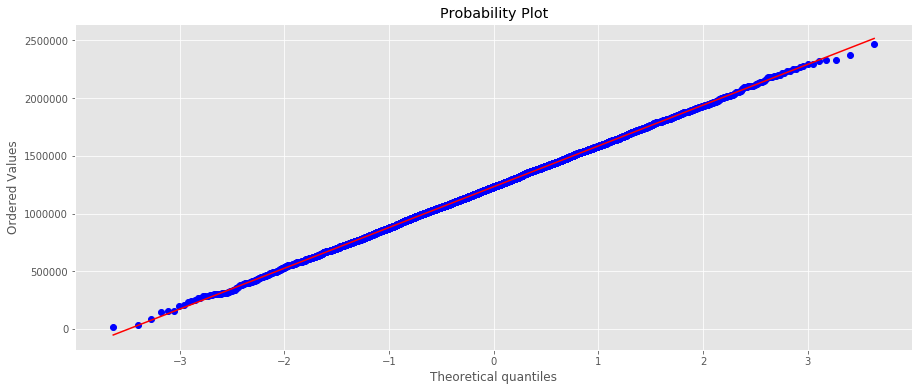

In [22]:
fig, ax = plt.subplots(figsize=(15,6))
rs = stats.probplot(df['Price'],plot = ax)
plt.show()

# DATA PRE PROCESSING

Since we have outliers in the dataset, it would be wise to use Robustscaler that is less susceptible to the presence of outliers. It is also important to note that eventhough non-distance based methods like Linear Regression, Random Forest etc do not necessarily require scaling, scaling the features improves computation time.

In [23]:
from pandas.plotting import scatter_matrix
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
import statsmodels.api as sm

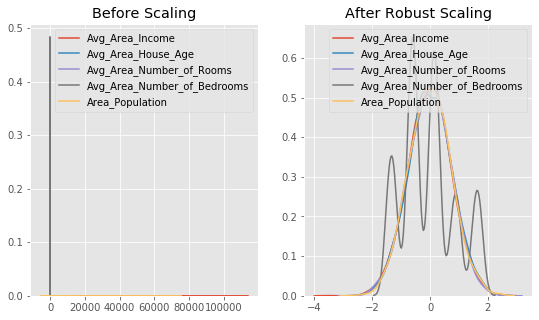

In [24]:
x = pd.DataFrame({
    'Avg_Area_Income': df.Avg_Area_Income,
    'Avg_Area_House_Age': df.Avg_Area_House_Age,
    'Avg_Area_Number_of_Rooms': df.Avg_Area_Number_of_Rooms,
    'Avg_Area_Number_of_Bedrooms' : df.Avg_Area_Number_of_Bedrooms,
    'Area_Population': df.Area_Population
})
    
scaler = preprocessing.RobustScaler()
robust_scaled_df = scaler.fit_transform(x)
robust_scaled_df = pd.DataFrame(robust_scaled_df, columns=['Avg_Area_Income', 'Avg_Area_House_Age', 'Avg_Area_Number_of_Rooms',
       'Avg_Area_Number_of_Bedrooms', 'Area_Population'])


fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(9, 5))
ax1.set_title('Before Scaling')
sns.kdeplot(x['Avg_Area_Income'], ax=ax1)
sns.kdeplot(x['Avg_Area_House_Age'], ax=ax1)
sns.kdeplot(x['Avg_Area_Number_of_Rooms'], ax=ax1)
sns.kdeplot(x['Avg_Area_Number_of_Bedrooms'], ax=ax1)
sns.kdeplot(x['Area_Population'], ax=ax1)

ax2.set_title('After Robust Scaling')
sns.kdeplot(robust_scaled_df['Avg_Area_Income'], ax=ax2)
sns.kdeplot(robust_scaled_df['Avg_Area_House_Age'], ax=ax2)
sns.kdeplot(robust_scaled_df['Avg_Area_Number_of_Rooms'], ax=ax2)
sns.kdeplot(robust_scaled_df['Avg_Area_Number_of_Bedrooms'], ax=ax2)
sns.kdeplot(robust_scaled_df['Area_Population'], ax=ax2)
plt.show()

In [25]:
robust_scaled_df.head(5)

,Avg_Area_Income,Avg_Area_House_Age,Avg_Area_Number_of_Rooms,Avg_Area_Number_of_Bedrooms,Area_Population
0,0.750985,-0.216456,0.004600,0.029630,-0.974382
1,0.730233,0.024441,-0.199090,-0.711111,0.295278
2,-0.525578,-0.078688,1.104787,0.800000,0.050735
3,-0.381677,0.916661,-1.036259,-0.585185,-0.140381
4,-0.616810,-0.699930,0.612083,0.133333,-0.731592


In [26]:
# predictor and target split
X = robust_scaled_df
y = df['Price']

In [27]:
# Test, Train Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0, test_size=0.3)

In [28]:
# Import the relevant packages
from sklearn.linear_model import LinearRegression
import xgboost as xgb
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor 
from sklearn.model_selection import GridSearchCV,train_test_split 
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

In [29]:
# Linear Regression. We will use backward elimination technique
X1 = sm.add_constant(X_train)
ols = sm.OLS(y_train,X1)
lr = ols.fit()

selected_features = list(X.columns)
pmax = 1
while (len(selected_features)>0):
    p= []
    X_1 = X[selected_features]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = selected_features)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        selected_features.remove(feature_with_p_max)
    else:
        break  
        
print('The selected features are :', selected_features)

The selected features are : ['Avg_Area_Income', 'Avg_Area_House_Age', 'Avg_Area_Number_of_Rooms', 'Area_Population']


We can see that out of the 5 features we started with originally, only 4 are selected

In [30]:
# let's confirm the p-values of the selected features 
print(model.pvalues)

const                       0.0
Avg_Area_Income             0.0
Avg_Area_House_Age          0.0
Avg_Area_Number_of_Rooms    0.0
Area_Population             0.0
dtype: float64


In [31]:
#Let's implement the feature selection for linear regression
X_lr = robust_scaled_df.drop(['Avg_Area_Number_of_Bedrooms'], axis = 1)
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(X_lr,y,random_state=0, test_size=0.3)

# Modelling

In [32]:
# Linear Regression
regressor = LinearRegression()
model=regressor.fit(X_train_lr, y_train_lr)
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Model Prediction

In [33]:
# Predict price using the models above
y_pred1 = regressor.predict(X_test_lr)        # Linear regression

In [34]:
#Find Accuracy value
accuracy = metrics.r2_score(y_test_lr,y_pred1)
print ("Accuracy for Linear Regression:", accuracy)
# Find R Squared (R^2) Values
print('The R^2 value for Linear Regression is        :', round((r2_score(y_test_lr,y_pred1)), 3))
# Find adjusted R Squared (Adj R2) Values
print('The Adj R2 value for Linear Regression is        :', round((1 - (1-r2_score(y_test,y_pred1))*(len(y)-1)/(len(y)-X.shape[1]-1)),3))
# Find Mean Squared Errors (MSE) and Root Mean Squared Errors (RMSE)
MSE_lr  = mean_squared_error(y_test_lr,y_pred1)
print('The RMSE value for Linear Regression is        :', round(np.sqrt(MSE_lr)));

Accuracy for Linear Regression: 0.9200578141331963
The R^2 value for Linear Regression is        : 0.92
The Adj R2 value for Linear Regression is        : 0.92
The RMSE value for Linear Regression is        : 101684.0


Text(0.5, 1.0, 'Linear Regression')

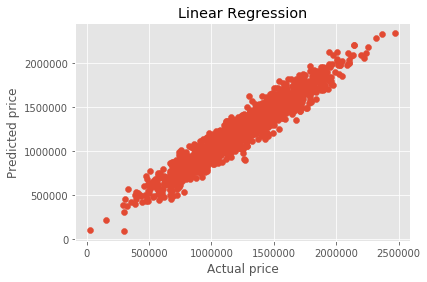

In [35]:
# Plot the actual vs predicted prices
plt.scatter(y_test_lr, y_pred1)
plt.xlabel("Actual price")
plt.ylabel("Predicted price")
plt.title("Linear Regression")

# K FOLD CROSS VALIDATION

In [36]:
# Perform 6-fold cross validation
scores = cross_val_score(model,robust_scaled_df, y, cv=6)
print ("Cross-validated scores:", scores)

Cross-validated scores: [0.91505    0.92162298 0.91659011 0.91769388 0.92006609 0.91459417]


Text(0.5, 1.0, 'K Fold Linear Regression')

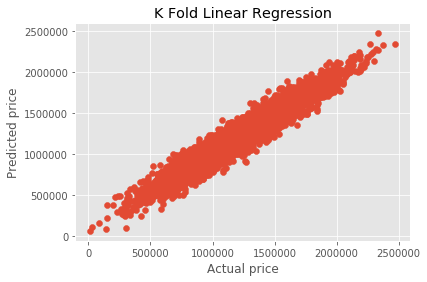

In [37]:
# Make cross validated predictions
predictions = cross_val_predict(model,robust_scaled_df, y, cv=6)
plt.scatter(y, predictions)
plt.xlabel("Actual price")
plt.ylabel("Predicted price")
plt.title("K Fold Linear Regression")

In [38]:
accuracy = metrics.r2_score(y, predictions)
print ("Cross-Predicted Accuracy:", accuracy)
# Find R Squared (R^2) Values
print('The R^2 value for K-FOLD Linear Regression is        :', round((r2_score(y, predictions)), 3))
# Find adjusted R Squared (Adj R2) Values
print('The Adj R2 value for K-FOLD Linear Regression is        :', round((1 - (1-r2_score(y, predictions))*(len(y)-1)/(len(y)-X.shape[1]-1)),3))
# Find Mean Squared Errors (MSE) and Root Mean Squared Errors (RMSE)
MSE_lr  = mean_squared_error(y, predictions)
print('The RMSE value for K-FOLD Linear Regression is        :', round(np.sqrt(MSE_lr)));

Cross-Predicted Accuracy: 0.9178093127582342
The R^2 value for K-FOLD Linear Regression is        : 0.918
The Adj R2 value for K-FOLD Linear Regression is        : 0.918
The RMSE value for K-FOLD Linear Regression is        : 101225.0


# Decision Tree Regressor

In [39]:
dec_tree = DecisionTreeRegressor()
predY = dec_tree.fit(X_train_lr,y_train_lr).predict(X_test_lr)
m2 = dec_tree.score(X_test_lr,y_test_lr)
print('Accuracy : ',dec_tree.score(X_test_lr,y_test_lr))
print('Root Mean Squared Error : ',np.sqrt(mean_squared_error(y_test_lr,predY)))

Accuracy :  0.7652087103714369
Root Mean Squared Error :  174263.36708518854


# Random Forest Regressor

In [42]:
rf_model = RandomForestRegressor(n_estimators = 100,random_state = 42)
rf_model.fit(X_train_lr,y_train_lr)
print('Accuracy : ',rf_model.score(X_test_lr,y_test_lr))
print('Mean absolute error for RF model: %0.4f' %mean_absolute_error(y_test_lr,rf_model.predict(X_test_lr)))

Accuracy :  0.8896068984774356
Mean absolute error for RF model: 95488.6460


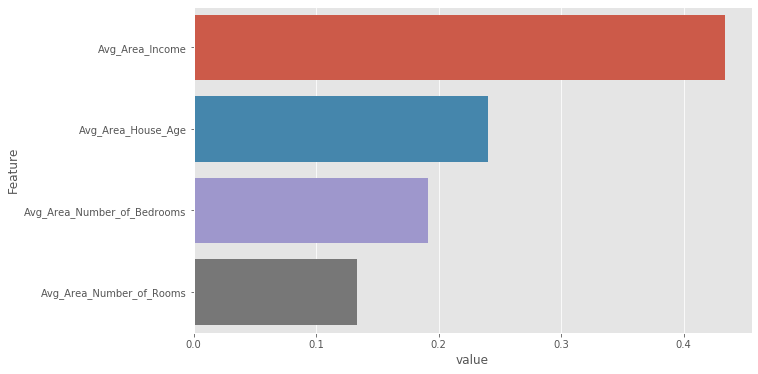

In [41]:
feature_importance = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns)), columns=['value','Feature'])
plt.figure(figsize=(10, 6)) 
sns.barplot(x="value", y="Feature", data=feature_importance.sort_values(by="value", ascending=False)) 